<a href="https://colab.research.google.com/github/kinba09/ML_projects/blob/main/Students_performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')


In [ ]:
df = pd.read_csv('StudentsPerformance.csv')
print(df.head())

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
new_data = pd.get_dummies(df, columns = ['race/ethnicity', 'gender', 'parental level of education', 'lunch', 'test preparation course'])
print(new_data)

     math score  reading score  writing score  race/ethnicity_group A  \
0            72             72             74                       0   
1            69             90             88                       0   
2            90             95             93                       0   
3            47             57             44                       1   
4            76             78             75                       0   
..          ...            ...            ...                     ...   
995          88             99             95                       0   
996          62             55             55                       0   
997          59             71             65                       0   
998          68             78             77                       0   
999          77             86             86                       0   

     race/ethnicity_group B  race/ethnicity_group C  race/ethnicity_group D  \
0                         1                 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                                          Non-Null Count  Dtype
---  ------                                          --------------  -----
 0   math score                                      1000 non-null   int64
 1   reading score                                   1000 non-null   int64
 2   writing score                                   1000 non-null   int64
 3   race/ethnicity_group A                          1000 non-null   uint8
 4   race/ethnicity_group B                          1000 non-null   uint8
 5   race/ethnicity_group C                          1000 non-null   uint8
 6   race/ethnicity_group D                          1000 non-null   uint8
 7   race/ethnicity_group E                          1000 non-null   uint8
 8   gender_female                                   1000 non-null   uint8
 9   gender_male                                     1000 non-null   

In [ ]:
new_data.describe().T


,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0
race/ethnicity_group A,1000.0,0.089,0.284886,0.0,0.00,0.0,0.0,1.0
race/ethnicity_group B,1000.0,0.190,0.392497,0.0,0.00,0.0,0.0,1.0
race/ethnicity_group C,1000.0,0.319,0.466322,0.0,0.00,0.0,1.0,1.0
race/ethnicity_group D,1000.0,0.262,0.439943,0.0,0.00,0.0,1.0,1.0
race/ethnicity_group E,1000.0,0.140,0.347161,0.0,0.00,0.0,0.0,1.0
gender_female,1000.0,0.518,0.499926,0.0,0.00,1.0,1.0,1.0
gender_male,1000.0,0.482,0.499926,0.0,0.00,0.0,1.0,1.0


In [ ]:
new_data.isnull().sum()


math score                                        0
reading score                                     0
writing score                                     0
race/ethnicity_group A                            0
race/ethnicity_group B                            0
race/ethnicity_group C                            0
race/ethnicity_group D                            0
race/ethnicity_group E                            0
gender_female                                     0
gender_male                                       0
parental level of education_associate's degree    0
parental level of education_bachelor's degree     0
parental level of education_high school           0
parental level of education_master's degree       0
parental level of education_some college          0
parental level of education_some high school      0
lunch_free/reduced                                0
lunch_standard                                    0
test preparation course_completed                 0
test prepara

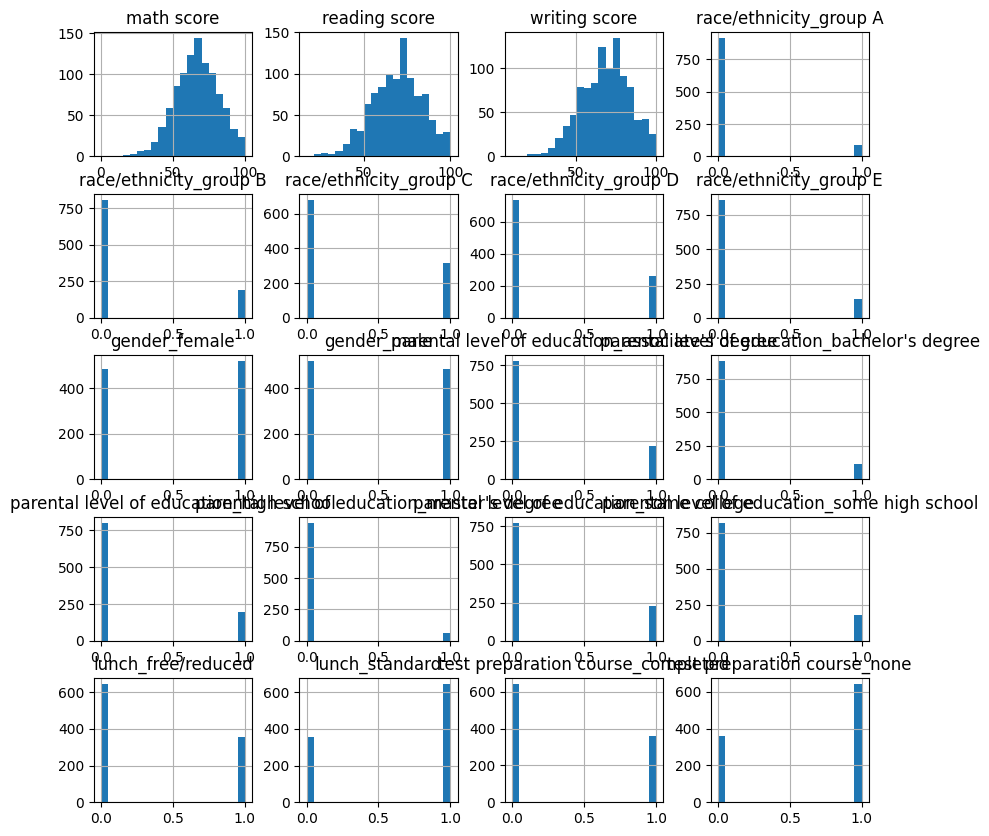

In [ ]:
new_data.hist(bins=20, figsize=(10, 10))
plt.show()


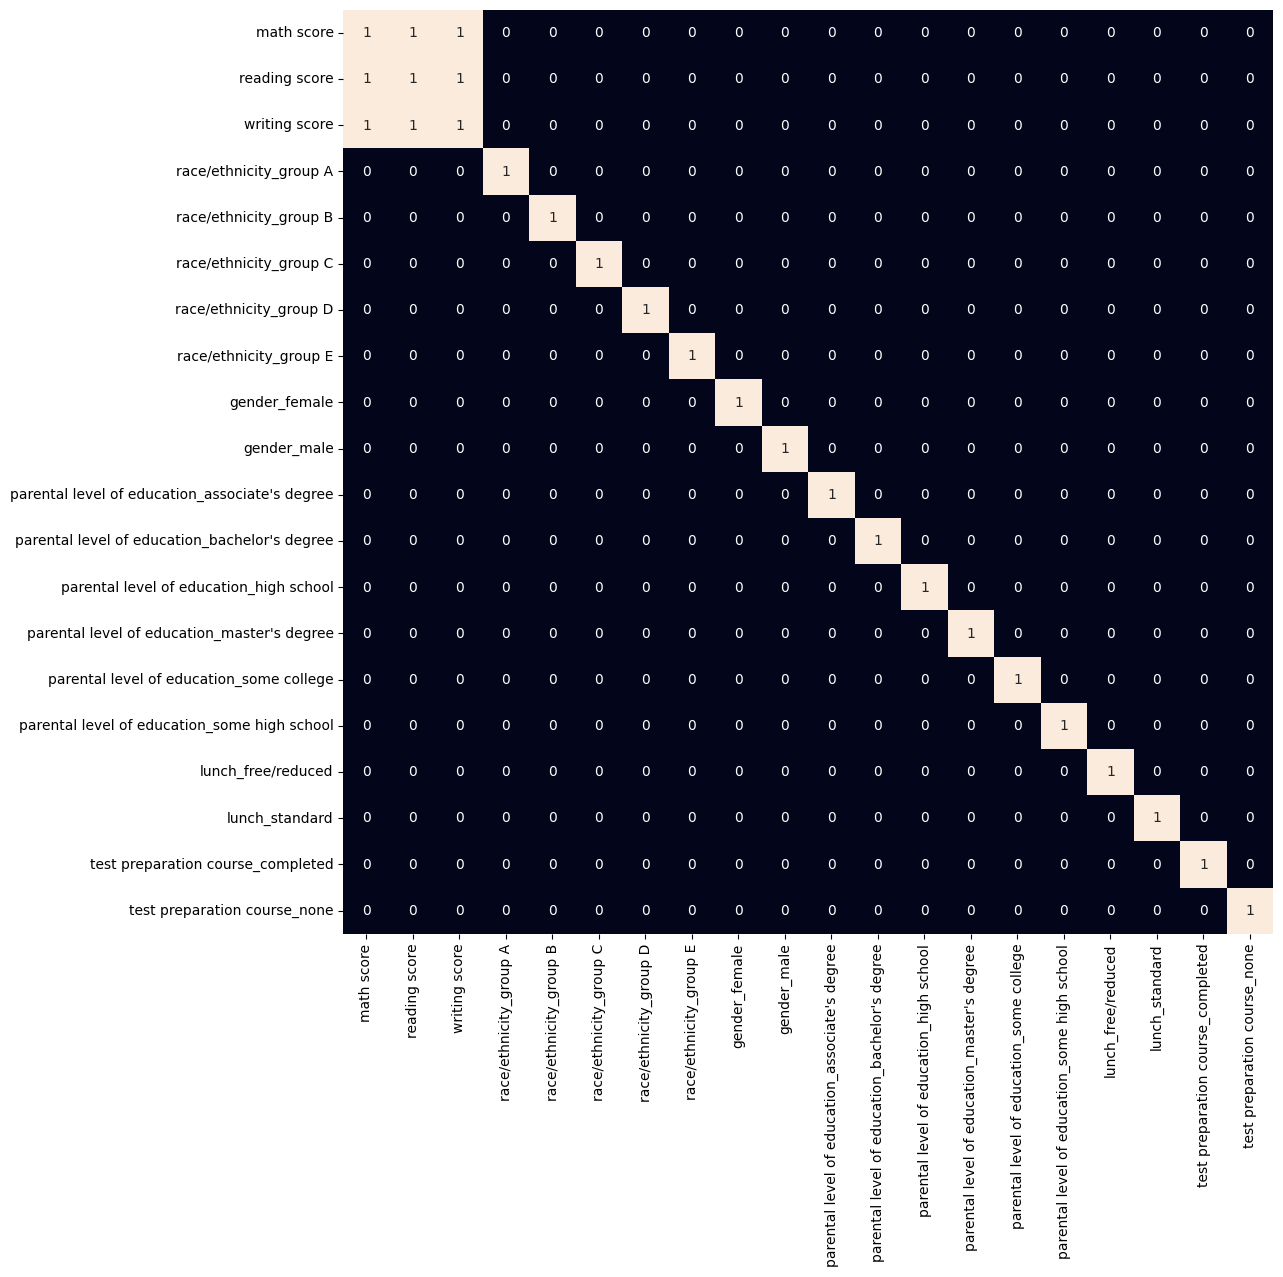

In [ ]:
plt.figure(figsize=(12, 12))
sb.heatmap(new_data.corr() > 0.7, annot=True, cbar=False)
plt.show()


In [ ]:
features = new_data.drop(['writing score'], axis=1)
target = new_data['writing score']

xtrain, xtest, ytrain, ytest = train_test_split(
	features, target, test_size=0.2, random_state=40)

xtrain.shape, xtest.shape, ytrain.shape, ytest.shape


((800, 19), (200, 19), (800,), (200,))

In [ ]:
norm = MinMaxScaler()
xtrain = norm.fit_transform(xtrain)
xtest = norm.transform(xtest)


In [ ]:
#for multiple models
models = [LinearRegression()]

for i in range(1):
	models[i].fit(xtrain, ytrain)

	print(f'{models[i]} : ')
	print('Training Accuracy : ', metrics.r2_score(ytrain, models[i].predict(xtrain)))
	print('Validation Accuracy : ', metrics.r2_score(
		ytest, models[i].predict(xtest)))
	print()


LinearRegression() : 
Training Accuracy :  0.9502431449141546
Validation Accuracy :  0.9360374277242605



In [ ]:
#LinearRegression() : 
#Training Accuracy :  0.9502431449141546
#Validation Accuracy :  0.9360374277242605

In [ ]:
from sklearn.tree import DecisionTreeRegressor # Import Decision Tree Classifier

modelsD = DecisionTreeRegressor()

#for i in range(1):
modelsD.fit(xtrain, ytrain)

print(f'{modelsD} : ')
print('Training Accuracy : ', metrics.r2_score(ytrain, modelsD.predict(xtrain)))
print('Validation Accuracy : ', metrics.r2_score(
		ytest, modelsD.predict(xtest)))
print()


DecisionTreeRegressor() : 
Training Accuracy :  0.9995188303707025
Validation Accuracy :  0.8697939524269288



In [ ]:
#DecisionTreeClassifier() : 
#Training Accuracy :  0.9990376607414051
#Validation Accuracy :  0.8203282717458088
#Model must have overfited 

#DecisionTreeRegressor() : 
#Training Accuracy :  0.9995188303707025
#Validation Accuracy :  0.8697939524269288

In [ ]:
import pickle
file = 'STP'
#save file
save = pickle.dump(models[0],open(file,'wb'))

In [ ]:
#test change for github